In [66]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=5

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
env: CUDA_VISIBLE_DEVICES=5


In [67]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict

In [68]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict

def parse_log_file(filepath):
    """
    Parse the output.log file to extract:
    - Iteration number and accumulation step info.
    - The answer (after "ANSWER:") and the extracted answer (after "EXTRACTED ANSWER:").
    - Whether they match (using simple string equality after stripping).
    
    Returns:
        data: list of dicts with keys:
              'iter': iteration number (int),
              'step': accumulation step (int),
              'answer': answer string,
              'extracted': extracted answer string,
              'match': boolean (True if answer equals extracted answer).
    """
    with open(filepath, 'r') as f:
        text = f.read()

    run_name_match = re.search(r"Run name:\s*(.*)", text)
    run_name = run_name_match.group(1).strip() if run_name_match else None

    # Split into blocks based on the iteration marker.
    # The regex uses a positive lookahead to split before a line starting with "Iter "
    blocks = re.split(r"(?=Iter\s+\d+,\s+Accumulation step)", text)
    
    data = []
    for block in blocks:
        # Check if block contains an iteration line
        iter_match = re.search(r"Iter\s+(\d+),\s+Accumulation step\s+(\d+)/\d+", block)
        if not iter_match:
            continue
        iter_num = int(iter_match.group(1))
        step_num = int(iter_match.group(2))
        
        # Extract the answer and extracted answer lines.
        answer_match = re.search(r"ANSWER:\s*(.*)", block)
        extracted_match = re.search(r"EXTRACTED ANSWER:\s*(.*)", block)
        if answer_match and extracted_match:
            answer_str = answer_match.group(1).strip().replace(",", "").replace(".", "").replace(" ", "").replace("-", "").replace("_", "").lower()
            extracted_str = extracted_match.group(1).strip().replace(",", "").replace(".", "").replace(" ", "").replace("-", "").replace("_", "").lower()
            is_match = (answer_str == extracted_str)
            contains_answer_prompt = extracted_match.group(1).strip() != "None"
            data.append({
                'iter': iter_num,
                'step': step_num,
                'answer': answer_str,
                'extracted': extracted_str,
                'contains_answer': is_match,
                'contains_answer_prompt': contains_answer_prompt,
                'reward': float(is_match) + 0.1 * contains_answer_prompt,
            })
    return data, run_name

def average_reward_per_iter(data):
    """
    Given the parsed data (list of dicts), compute the average match rate
    (i.e. fraction of accumulation steps where answer == extracted answer)
    for each iteration.
    
    Returns:
        iter_numbers: list of iteration numbers (sorted)
        avg_matches: list of average match (float) corresponding to each iteration.
    """
    iter_dict = defaultdict(list)
    for entry in data:
        iter_dict[entry['iter']].append(entry['reward'])
    
    iter_numbers = sorted(iter_dict.keys())
    avg_matches = [sum(iter_dict[i]) / len(iter_dict[i]) for i in iter_numbers]
    lengths = [len(iter_dict[i]) for i in iter_numbers]
    print(f"Lengths: {lengths}")
    return iter_numbers, avg_matches

def plot_reward(iter_numbers, avg_matches):
    """
    Plot average match rate per iteration using matplotlib.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(iter_numbers, avg_matches, marker='o', linestyle='-')
    plt.xlabel('Iteration')
    plt.ylabel('Fraction of steps with answer == extracted answer')
    plt.title('Reward vs Iteration')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.show()

def main(filepath='output.log'):
    # Parse the log file
    data, run_name = parse_log_file(filepath)
    
    if not data:
        print("No valid data found in the file.")
        return
    
    # Compute average matches per iteration
    iter_numbers, avg_reward = average_reward_per_iter(data)
    
    # Print some output for inspection
    for i, avg in zip(iter_numbers, avg_reward):
        print(f"Iter {i}: Average reward = {avg:.2f}")
    
    # Plot the result
    plot_reward(iter_numbers, avg_reward)

# For testing, call main with the correct path.
# if __name__ == '__main__':
#     main('output.log')


In [69]:
def read_floats(filepath):
    floats = []
    with open(filepath, 'r') as f:
        for line in f:
            line = line.strip()
            if line:
                try:
                    floats.append(float(line))
                except ValueError:
                    print(f"Skipping non-numeric line: {line}")
    return floats

In [70]:
project_dir = "/homes/80/anya/Documents/llm_tiny_ideas/coconut-outer/coconut"
run_file_names = [
    "run-20250307_043929-hw18r3zs",
    "run-20250307_043926-bld8nfej",
    # "run-20250307_043924-oggjd6fr",
    # "run-20250307_043922-grr9lva9",
    # "run-20250307_043919-xbp1haig",
]             
run_names = []
all_iter_numbers = []
all_avg_reward = []
for run_file_name in run_file_names:
    data, run_name = parse_log_file(f"{project_dir}/wandb/{run_file_name}/files/output.log")
    iter_numbers, avg_reward = average_reward_per_iter(data)
    all_iter_numbers.append(iter_numbers)
    all_avg_reward.append(avg_reward)
    run_names.append(run_name)

Lengths: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 13]
Lengths: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 

In [71]:
baseline_run_name = "RUNS0--Qw0.5b-pg-steps512-grpo--B1024-G4-lr1e-06--ap0.1-kl0.001-ent0.001--q7xu"
baseline_run_name = "RUNS0--Qw0.5b-pg-steps256-grpo--B64-G4-lr1e-06--ap0.1-kl0.001-ent0.001--x0e2"
baseline_filepath = f"{project_dir}/outputs/uploaded_from_wandb/{baseline_run_name}"

baseline_reward = read_floats(baseline_filepath)
baseline_iter_numbers = list(range(1, len(baseline_reward) + 1))
run_names.append("Baseline")
all_iter_numbers.append(baseline_iter_numbers)
all_avg_reward.append(baseline_reward)



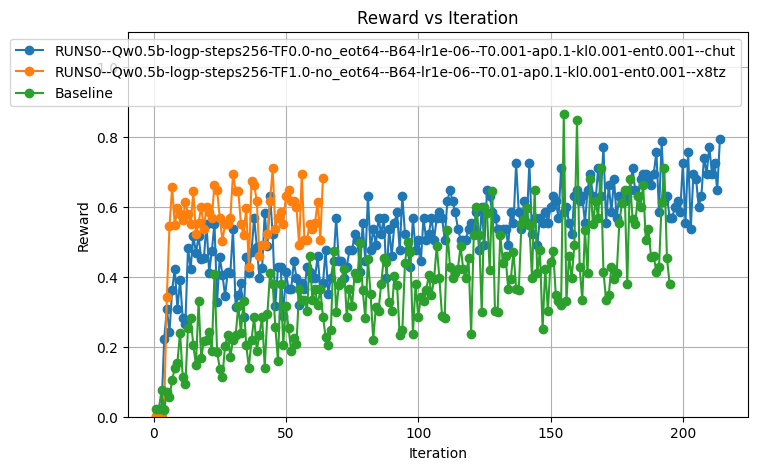

In [72]:
fig, ax = plt.subplots(figsize=(8, 5))
for run_name, iter_numbers, avg_matches in zip(run_names, all_iter_numbers, all_avg_reward):
    ax.plot(iter_numbers, avg_matches, marker='o', linestyle='-', label=run_name)
ax.set_xlabel('Iteration')
ax.set_ylabel('Reward')
ax.set_title('Reward vs Iteration')
ax.legend()
ax.set_ylim(0, 1.1)
ax.grid(True)
plt.show()